In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1b0EgRYh3IWypUTvbPNUHGutu9o2IYkz-')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


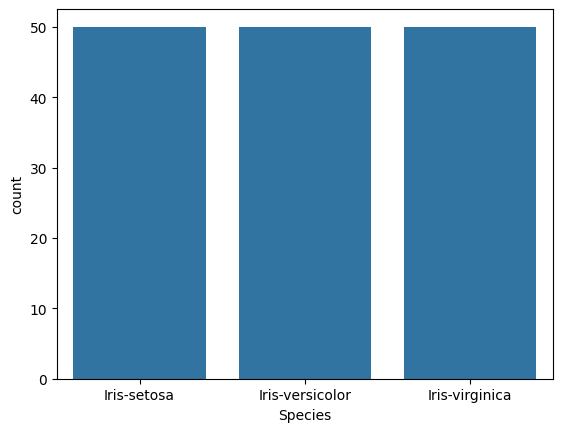

In [6]:
sns.countplot(x="Species", data=df)
plt.show()

In [7]:
X = df.drop(["Id","Species"], axis=1)

In [8]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
le = LabelEncoder()
df["SpeciesEncoded"] = le.fit_transform(df["Species"])

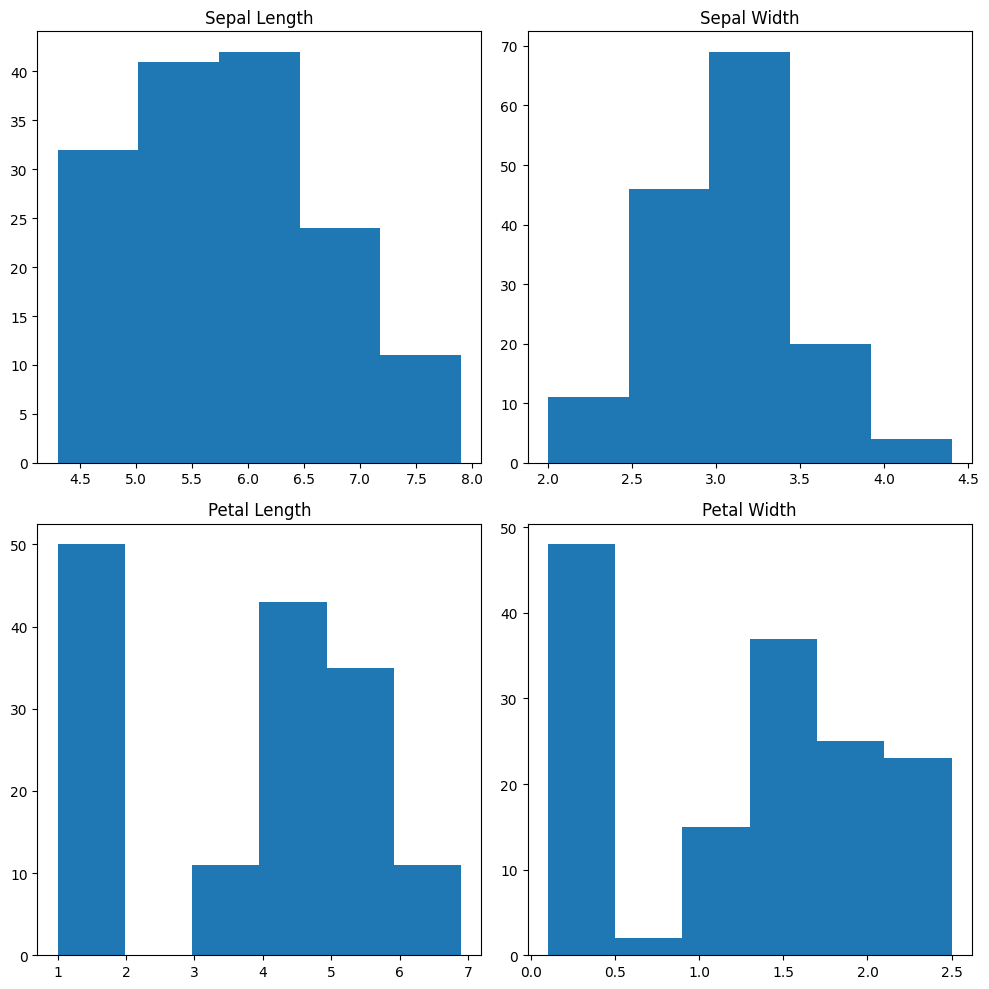

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Histogram 1 : Sepal Length
axes[0, 0].set_title("Sepal Length")
axes[0, 0].hist(X["SepalLengthCm"], bins=5)

# Histogram 2 : Sepal Width
axes[0, 1].set_title("Sepal Width")
axes[0, 1].hist(X["SepalWidthCm"], bins=5)

# Histogram 3 : Petal Length
axes[1, 0].set_title("Petal Length")
axes[1, 0].hist(X["PetalLengthCm"], bins=6)

# Histogram 4 : Petal Width
axes[1, 1].set_title("Petal Width")
axes[1, 1].hist(X["PetalWidthCm"], bins=6)

plt.tight_layout()
plt.show()

In [10]:
scaler = StandardScaler()

# Re-initialize X from the original DataFrame 'df'
# This ensures X is a DataFrame with named columns for indexing before scaling
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Now apply the scaling
X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

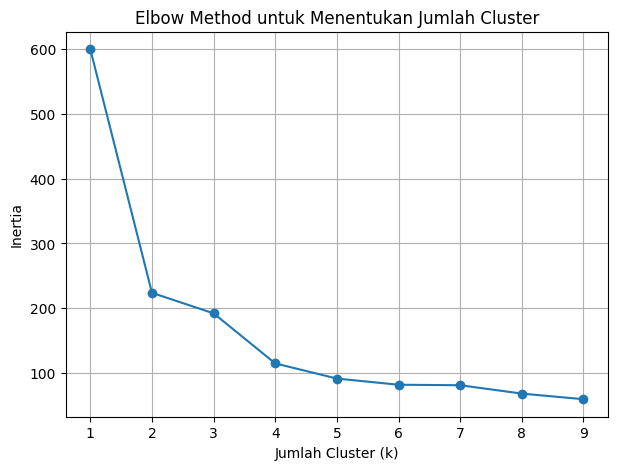

In [11]:
inertia_list = []
K_range = range(1, 10)

for k in K_range:
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X)
  inertia_list.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia_list, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [12]:
kmeans = KMeans(
    n_clusters=3,     # Karena dataset Iris ada 3 Species
    init='k-means++',
    random_state=42
)

# 1. Latih model (menentukan centroid + proses clustering)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [13]:
# 2. Prediksi cluster untuk data X
labels = kmeans.predict(X)

In [14]:
# 3. Masukkan ke DataFrame
df["Cluster"] = labels

In [15]:

print("Cluster ditemukan :", df["Cluster"].unique())

Cluster ditemukan : [1 2 0]


In [18]:
sil_score = silhouette_score(X, df['Cluster'])
print("===== SILHOUETTE SCORE =====")
print("Silhouette Score :", sil_score)

===== SILHOUETTE SCORE =====
Silhouette Score : 0.4787241921049546


In [21]:
print("===== CONFUSION MATRIX =====")
cm = confusion_matrix(df['SpeciesEncoded'], df['Cluster'])
print(cm)

===== CONFUSION MATRIX =====
[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


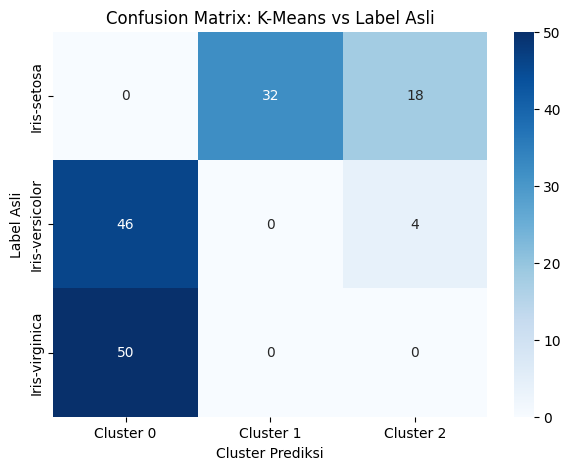

In [22]:
plt.figure(figsize=(7,5))
sns.heatmap(
  cm, annot=True, fmt='d', cmap='Blues',
  xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
  yticklabels=le.classes_
)
plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt.show()

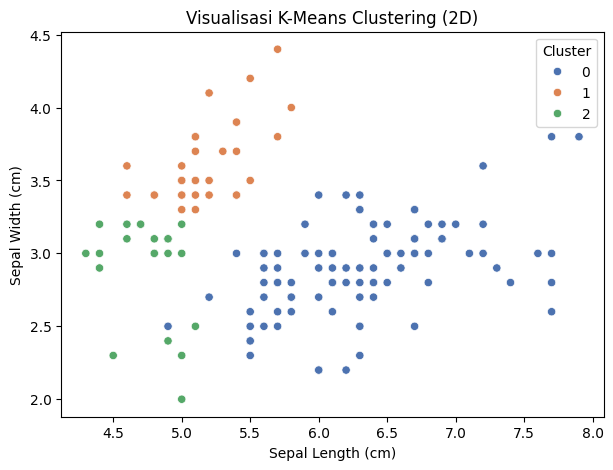

In [23]:
plt.figure(figsize=(7,5))
sns.scatterplot(
  x=df["SepalLengthCm"],
  y=df["SepalWidthCm"],
  hue=df["Cluster"],
  palette="deep"
)
plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

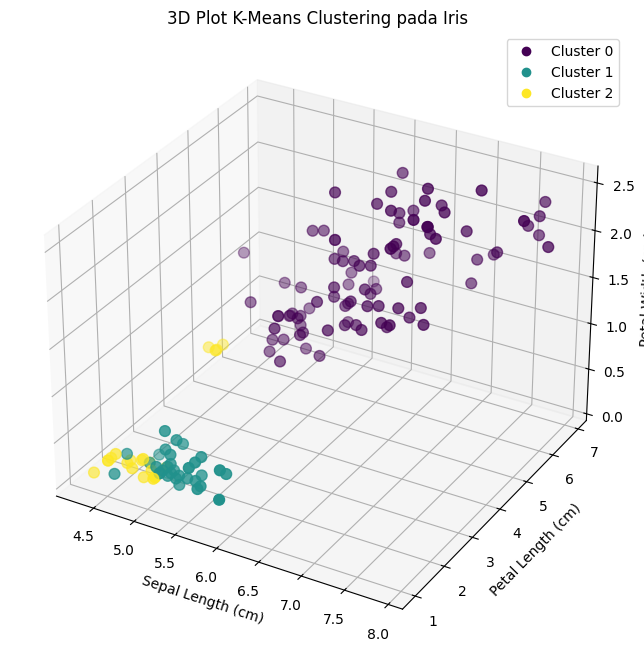

In [26]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
  df["SepalLengthCm"],
  df["PetalLengthCm"],
  df["PetalWidthCm"],
  c=df["Cluster"],
  s=60
)
ax.set_title("3D Plot K-Means Clustering pada Iris")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")

# Legend cluster
legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()